### <center>Multi Classification AUC_ROC Curves
#### <center>One vs rest ROC strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('./fetal_health.csv')
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.shape

(2126, 22)

In [5]:
data.isnull().mean()*100

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

In [6]:
data.duplicated().sum()

13

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

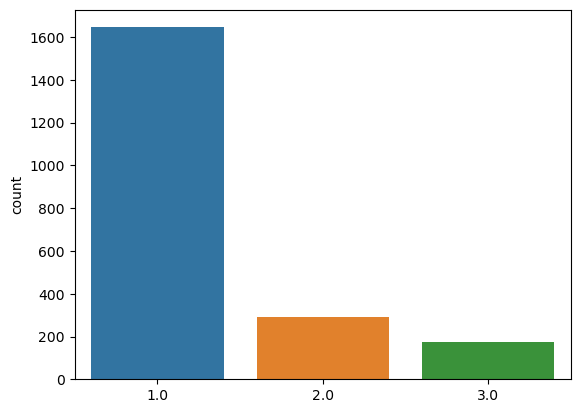

In [10]:
sns.countplot(x=y)
plt.show()

In [11]:
ROS = RandomOverSampler()

In [12]:
x_over,y_over = ROS.fit_resample(x,y)

In [13]:
x = x_over
y = y_over

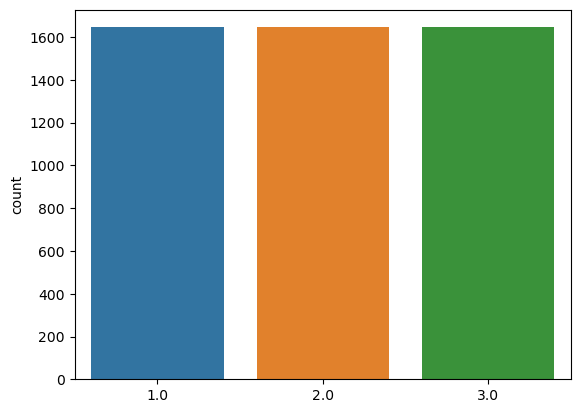

In [14]:
sns.countplot(x=y_over)
plt.show()

In [15]:
data.fetal_health.unique()

array([2., 1., 3.])

#### We have to binarize the target

In [16]:
data.fetal_health.unique()

array([2., 1., 3.])

In [17]:
y = label_binarize(y,classes=[2., 1., 3.])
n_classes = 3

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### Initializing the classifier

In [19]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = clf.fit(x_train,y_train).predict_proba(x_test)

#### Computing auc and roc for each class

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

#### Plotting ROC curve for specific classes

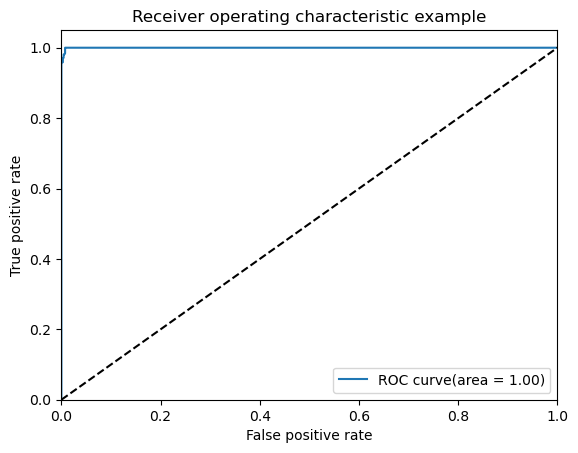

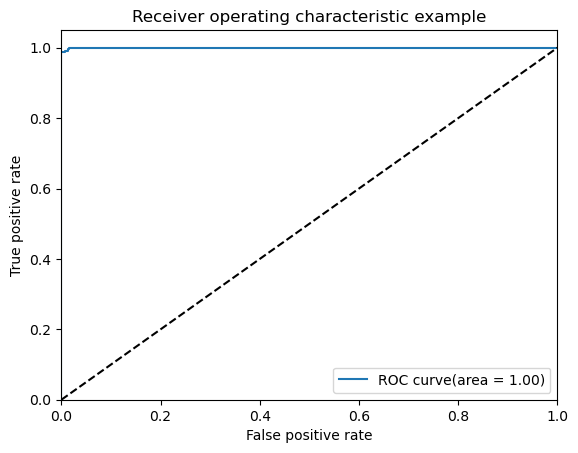

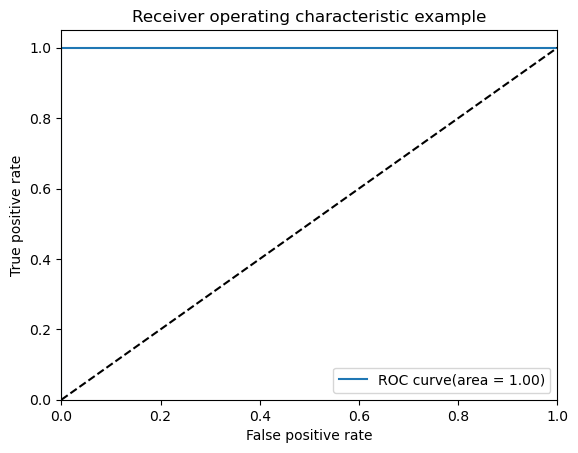

In [21]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = 'ROC curve(area = %0.2f)'% roc_auc[i])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()